<a href="https://colab.research.google.com/github/abequette/CS167Fall22Code/blob/main/Day11_NotesScikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 11 Notes: Introduction to [Scikit-Learn](https://scikit-learn.org/stable/modules/classes.html)

The overall algorithm for scikit-learn (sklearn) is:
0. Load Libraries
1. Load data
2. Split Data: use `train_test_split()`
3. Create a classifier/regressor object
4. Call `fit()` (to train the model)
5. Call `predict()` to get the predictions
6. Call a metric function to measure performance

In the cell below, we do steps 0-2:

In [1]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

In [3]:
# take a look at the data... make sure you understand what split of data is stored in each 
print('train_data shape: ',train_data.shape)
print('test_data shape: ',test_data.shape)
print('train_sln shape: ',train_sln.shape)
print('test_sln shape: ',test_sln.shape)

print("\nTRAINING data\n", train_data.head(),"\n")
print("\nTESTING data\n",test_data.head(),"\n")
print("\nTRAINING solutions\n",train_sln.head(),"\n")
print("\nTESTING solutions\n",test_sln.head(),"\n")


train_data shape:  (120, 4)
test_data shape:  (30, 4)
train_sln shape:  (120,)
test_sln shape:  (30,)

TRAINING data
      sepal length  sepal width  petal length  petal width
79            5.7          2.6           3.5          1.0
54            6.5          2.8           4.6          1.5
106           4.9          2.5           4.5          1.7
90            5.5          2.6           4.4          1.2
145           6.7          3.0           5.2          2.3 


TESTING data
      sepal length  sepal width  petal length  petal width
119           6.0          2.2           5.0          1.5
128           6.4          2.8           5.6          2.1
135           7.7          3.0           6.1          2.3
91            6.1          3.0           4.6          1.4
112           6.8          3.0           5.5          2.1 


TRAINING solutions
 79     Iris-versicolor
54     Iris-versicolor
106     Iris-virginica
90     Iris-versicolor
145     Iris-virginica
Name: species, dtype: object 



In [4]:
#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier(random_state = 0)

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

In [6]:
# all together now: 
#classic scikit-learn algorithm

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)

#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier(random_state=41)

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))

# Show the acutal and predicted (this isn't necessary, but may help catch bugs)
print("___PREDICTED___ \t  ___ACTUAL___")
for i in range(len(test_sln)):
    print(iris_predictions[i],"\t\t", test_sln.iloc[i])

print("-------------------------------------------------------")
#print out a confusion matrix
iris_labels= ["Iris-setosa", "Iris-versicolor","Iris-virginica"]
conf_mat = metrics.confusion_matrix(test_sln, iris_predictions, labels=iris_labels)
print(pandas.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

Accuracy: 0.9
___PREDICTED___ 	  ___ACTUAL___
Iris-versicolor 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-virginica 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-virginica 		 Iris-virginica
Iris-setosa 		 Iris-setosa
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-versicolor 		 Iris-versicolor
Iris-setosa 		 Iris-setosa
Iris-versicolor 		 Iris-versic

## Exercise #1

- Explore different parameters you could use in the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- Can you improve the 90% accuracy with test/train random_state = 41 and DecisionTreeClassifier(random_state=0)?
- Consider looking at the criterion, max_depth, max_leaf_nodes parameters


In [25]:
# code for Exercise #1:

#0. import libraries
import sklearn
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

#1. load data
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167/irisData.csv')

#2. split data
predictors = ['sepal length', 'sepal width','petal length', 'petal width']
target = "species"
train_data, test_data, train_sln, test_sln = \
        train_test_split(iris_data[predictors], iris_data[target], test_size = 0.2, random_state=41)


#3. Create classifier/regressor object (change these parameters for Exercise #1)
dt = tree.DecisionTreeClassifier(random_state=0)
dt = tree.DecisionTreeClassifier(random_state=0, criterion="entropy")

#4. Call fit (to train the classification/regression model)
dt.fit(train_data,train_sln)

#5. Call predict to generate predictions
iris_predictions = dt.predict(test_data)

#6. Call a metric function to measure performance
print("Accuracy:", metrics.accuracy_score(test_sln,iris_predictions))



Accuracy: 0.9


## Plotting Decision Trees


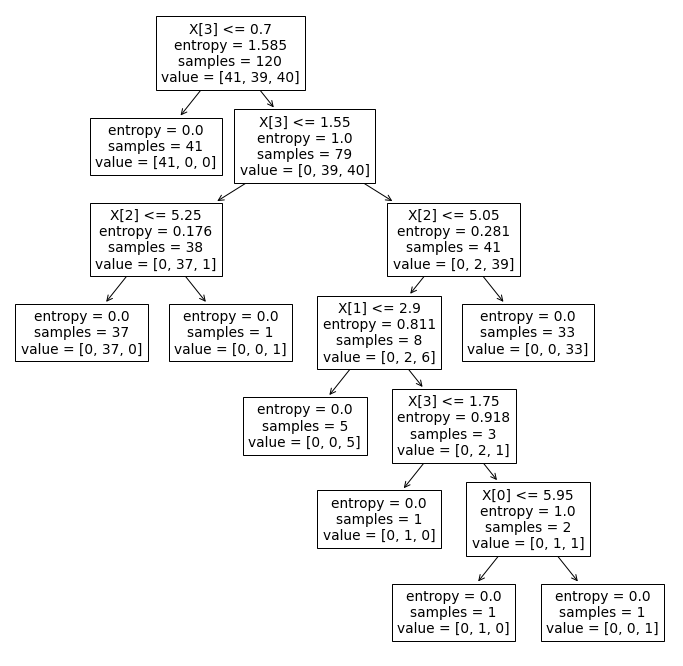

In [26]:
# visualizing decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12)) # Makes sure the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree

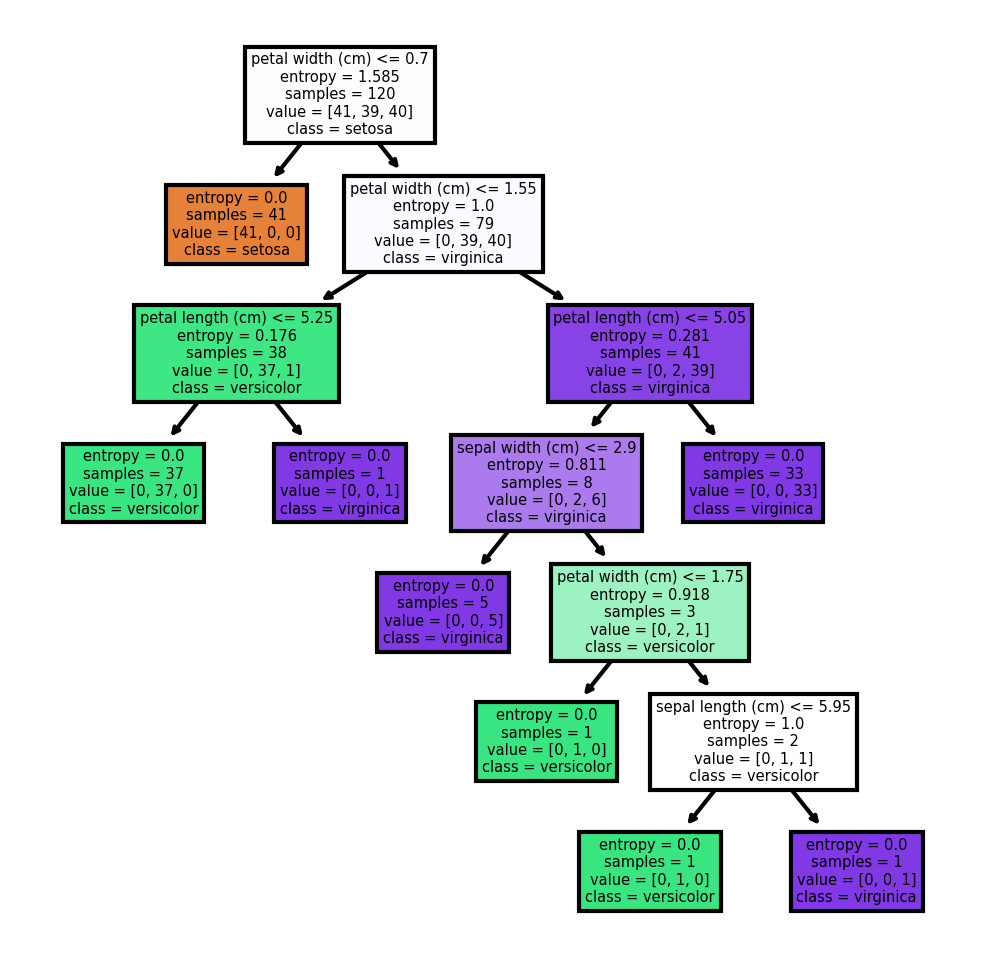

In [27]:
#tweak paramters to make it pretty
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Text(0.5, 0, 'Predicted label')

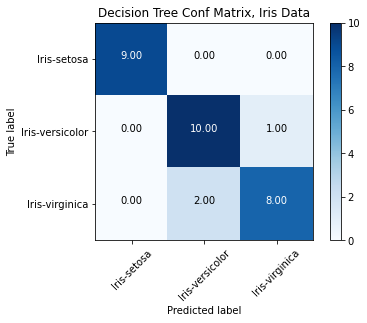

In [28]:
# a pretty confusion matrix
import itertools

cm=metrics.confusion_matrix(test_sln,iris_predictions)
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Decision Tree Conf Matrix, Iris Data')
plt.colorbar()
plt.xticks([0,1,2], dt.classes_,rotation=45)
plt.yticks([0,1,2], dt.classes_)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Exercise #2:
With the aid of the documentation, try the following:
- Create a decision tree with an early stopping parameter
- Visualize your trees to see if it is working right.
- Look at your performance metrics to see how it changes performance.
- Determine which of the features (petal length, sepal length, etc) were the most important. How does it determine these numbers?


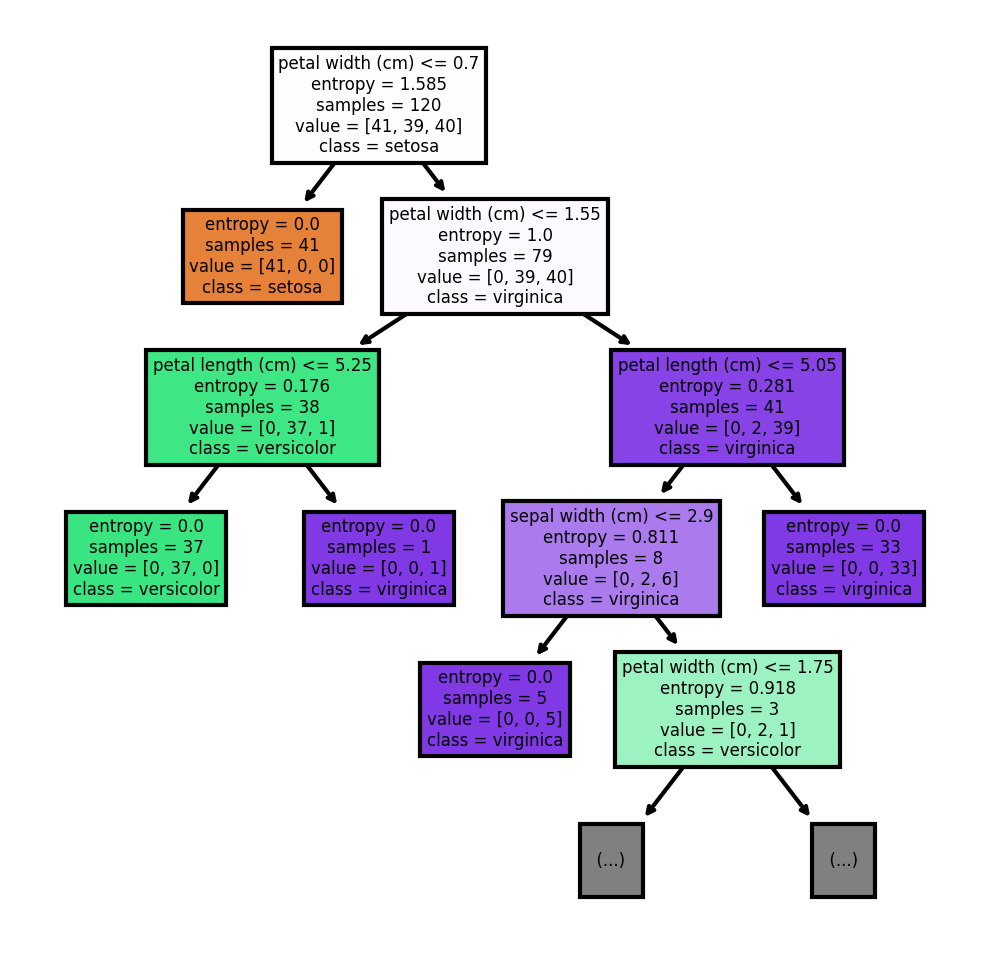

In [31]:
import matplotlib.pyplot as plt
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               max_depth = 4,
               filled = True);


## Exercise #3
Check out the scikit-learn kNN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=neighbors#sklearn.neighbors.KNeighborsClassifier):

Find the documentation for the kNN classifier (i.e., the classifier, not an unsupervised algorithm). Answer the following questions:
- What is the default value of k it uses?
- Does it do weighted or unweighted kNN by default?

Now implement kNN using SciKit-Learn.
- What is the accuracy on the Iris dataset for k = 100, both weighted and unweighted?
- How do the weighted and unweighted versions do for small values of k?


[docs for knn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

## Let's try regression now:


In [ ]:
# load in the WineQuality.csv data for scikit learn
import pandas
import numpy

# load data
wine_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/winequality-white.csv')

# set the predictor variables and target variable
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target= 'quality'

# use train_test_split() to split the data
train_data, test_data, train_sln, test_sln = train_test_split(wine_data[predictors], wine_data[target], test_size = 0.2, random_state=41)
train_data

In [ ]:
from sklearn import neighbors
# create our model
neigh = neighbors.KNeighborsRegressor() ### Don't miss this! Doing Regression here!!

# fit (train) the model to the data
neigh.fit(train_data, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data)

# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

In [ ]:
# Normalization code using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


# Exercise #4
- Run kNN regressor algorithm with k (n_neighbors) = 15
- Run again with normalized values
- Which provides a better R^2?